In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt 
import numpy as np

In [73]:
# augmentation configuration used for training
train_data= ImageDataGenerator(
        rescale=1/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
)

# augmentation configuration used for testing
# rescaling of the images only
test_data= ImageDataGenerator(rescale=1/255)

#path of the directories
DIR= r'D:\C_D_images'
folder=['train', 'valid']
path1= os.path.join(DIR,folder[0])
path2= os.path.join(DIR,folder[1])

#this is the generator that will read the images from the subfolders and generate batches of augmented image data

train_gen= train_data.flow_from_directory(path1, batch_size= 42, target_size= (150,150), class_mode='binary', shuffle=False)
test_gen= test_data.flow_from_directory(path2, batch_size= 42, target_size=(150,150), class_mode='binary', shuffle=False)

Found 42 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [81]:
# making of the model
# consists of three convolution layers and two densely connected layers
# after every layer, data is normalized to avoid overfitting

model= Sequential()

model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu'))
BatchNormalization()
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation= 'relu', input_shape=(150,150,3)))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.compile(
     optimizer= 'adam',
     loss= 'binary_crossentropy',
     metrics=['accuracy']
)

In [83]:
his= model.fit(train_gen, epochs= 40, validation_data= test_gen)

Epoch 1/40
1/1 [==============================] - 3s 3s/step - loss: 0.6920 - accuracy: 0.5714 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 2/40
1/1 [==============================] - 2s 2s/step - loss: 0.6858 - accuracy: 0.5238 - val_loss: 0.7313 - val_accuracy: 0.5000
Epoch 3/40
1/1 [==============================] - 2s 2s/step - loss: 0.7773 - accuracy: 0.5000 - val_loss: 0.9528 - val_accuracy: 0.5000
Epoch 4/40
1/1 [==============================] - 2s 2s/step - loss: 0.9197 - accuracy: 0.5000 - val_loss: 0.7246 - val_accuracy: 0.5000
Epoch 5/40
1/1 [==============================] - 2s 2s/step - loss: 0.7189 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 6/40
1/1 [==============================] - 2s 2s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 7/40
1/1 [==============================] - 2s 2s/step - loss: 0.7002 - accuracy: 0.5000 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 8/40
1/1 [=========================

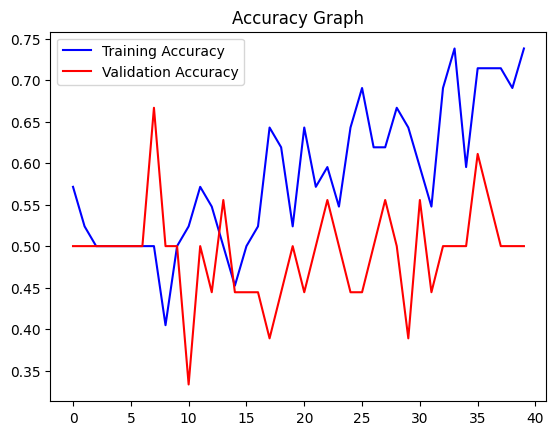

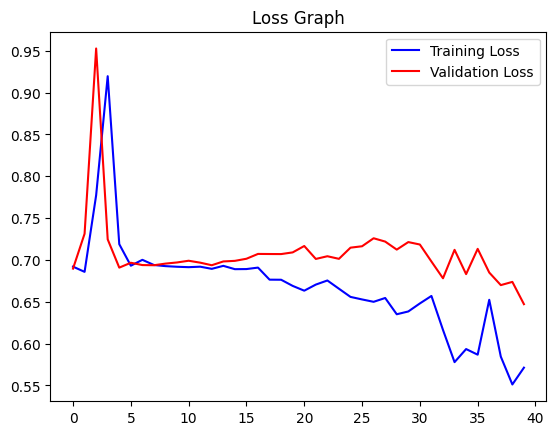

In [85]:
# plotting the loss and accuracy

acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = his.history['loss']
val_loss = his.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

1/1 [==============================] - 0s 27ms/step
cat


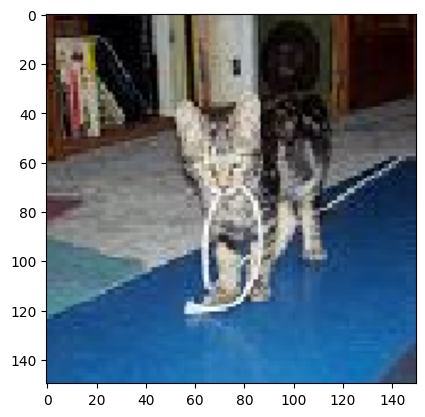

In [88]:
# prediction using the model

img_path= r'D:\C_D_images'
file='44.jpg'
img_path= os.path.join(img_path,file)
img= image.load_img(img_path, target_size=(150,150))
img= np.array(img)
plt.imshow(img)
img= img.reshape(1,150,150,3)
pred=model.predict(img)
if(pred[0]>0.5):
    print('dog')
else:
    print('cat')